# Data Visualization for Finance
## Complete Teaching Guide with Examples

This notebook covers all major data visualization techniques used in financial analysis:
1. Static 2D plotting with matplotlib
2. Different plot styles (scatter, histogram, boxplot)
3. Random Numbers Generation

## 1. Setup and Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## 2. Load Data

If you uploaded the sample data to Kaggle, load it here. Otherwise, we'll generate sample data.

In [21]:
# Load from Kaggle (if you uploaded the CSV)
df = pd.read_csv('/kaggle/input/bmwprice1/BMW.csv')

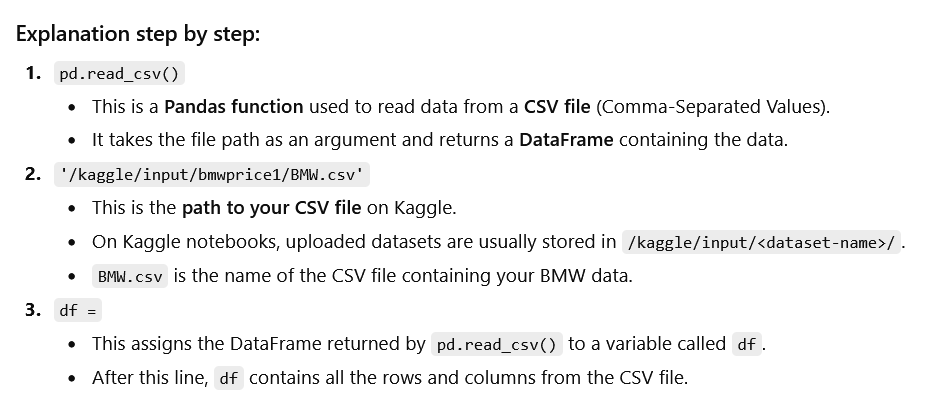

In [3]:
#Head (first rows of the DataFrame)
df.head()

,Years,Prices
0,06/11/1995,11.984
1,07/11/1995,12.000
2,08/11/1995,12.158
3,09/11/1995,12.316
4,10/11/1995,12.221


In [5]:
#You can specify any number:
df.head(10)   # first 10 rows

,Years,Prices
0,06/11/1995,11.984
1,07/11/1995,12.000
2,08/11/1995,12.158
3,09/11/1995,12.316
4,10/11/1995,12.221
5,13/11/1995,12.221
6,14/11/1995,12.403
7,15/11/1995,12.292
8,16/11/1995,12.364
9,17/11/1995,12.395


In [6]:
#Tail (last rows of the DataFrame)
df.tail()

,Years,Prices
4693,31/10/2013,83.680
4694,01/11/2013,83.003
4695,04/11/2013,84.051
4696,05/11/2013,81.551
4697,06/11/2013,82.342


# Check what your Years column looks like

In [22]:
print(df['Years'].dtype)

object


`object` means our Years column is stored as text, not numbers or real dates.

In [23]:
df['Years'] = pd.to_datetime(df['Years'], dayfirst=True)

We are converting the Years column into proper datetime format using pd.to_datetime()
with dayfirst=True because the dates are in DD/MM/YYYY format.

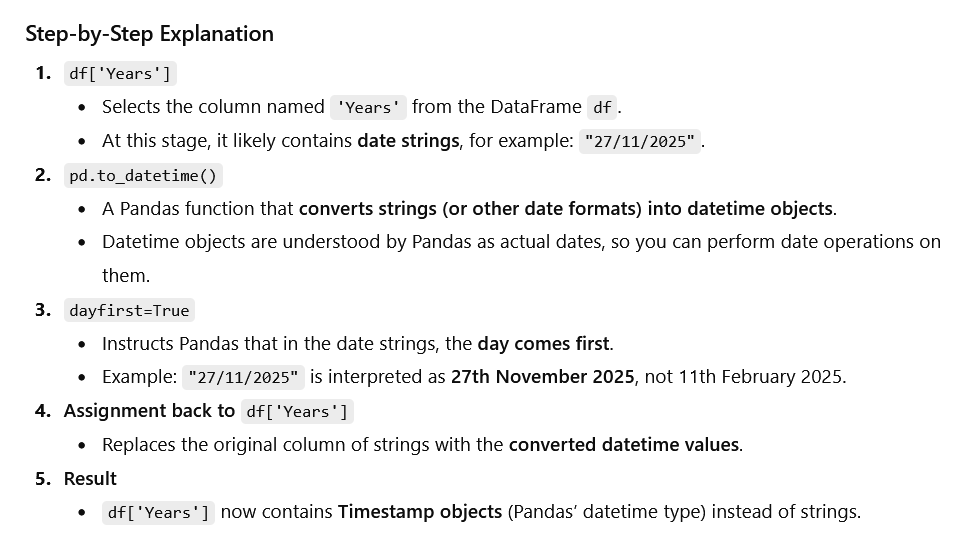

# Descriptive Statistics of BMW Prices

In [28]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Assuming df['Prices'] contains your BMW price data
data = df['Prices']

# Descriptive statistics
mean_value = data.mean()
median_value = data.median()
std_value = data.std()
skewness = skew(data)
kurt = kurtosis(data)

# Display results
print("Descriptive Statistics for BMW Prices:")
print(f"Mean: {mean_value:.2f}")
print(f"Median: {median_value:.2f}")
print(f"Standard Deviation: {std_value:.2f}")
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurt:.2f}")

Descriptive Statistics for BMW Prices:
Mean: 37.40
Median: 35.31
Standard Deviation: 14.96
Skewness: 0.79
Kurtosis: 0.37


## Basic Line Plots

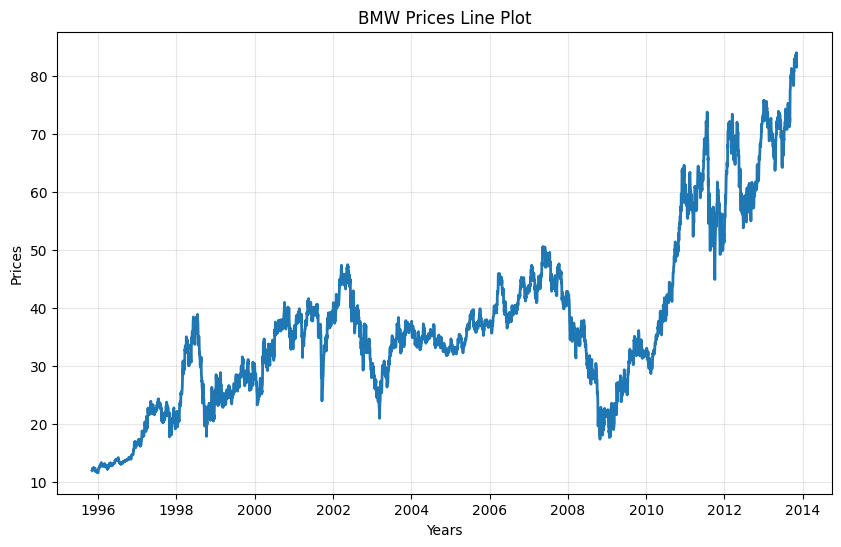

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))                # 1️⃣

plt.plot(df['Years'], df['Prices'], lw=2)  # 2️⃣

plt.xlabel('Years')                        # 3️⃣
plt.ylabel('Prices')                       # 4️⃣
plt.title('BMW Prices Line Plot')          # 5️⃣

plt.grid(True, alpha=0.3)                  # 6️⃣

plt.show()                                 # 7️⃣


# Basic Histograms

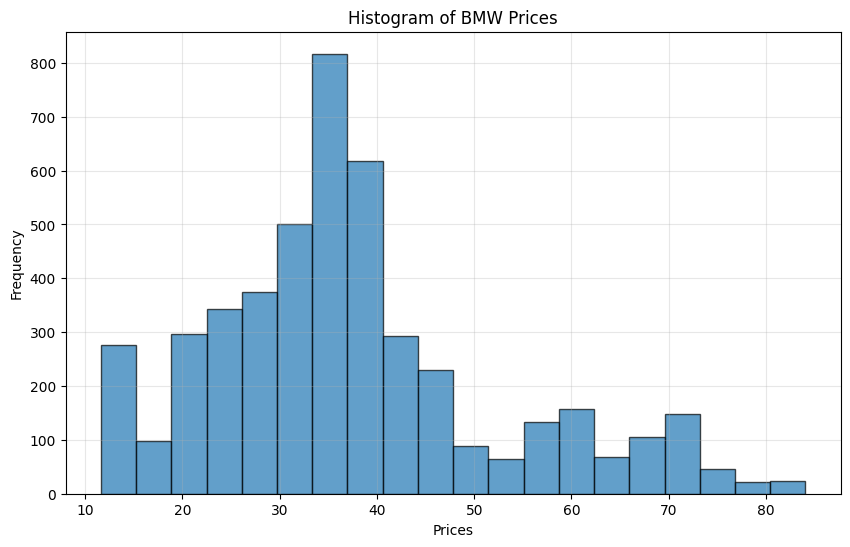

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Histogram of BMW Prices
plt.hist(df['Prices'], bins=20, alpha=0.7, edgecolor='black')

plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.title('Histogram of BMW Prices')

plt.grid(True, alpha=0.3)

plt.show()


# Box Plot

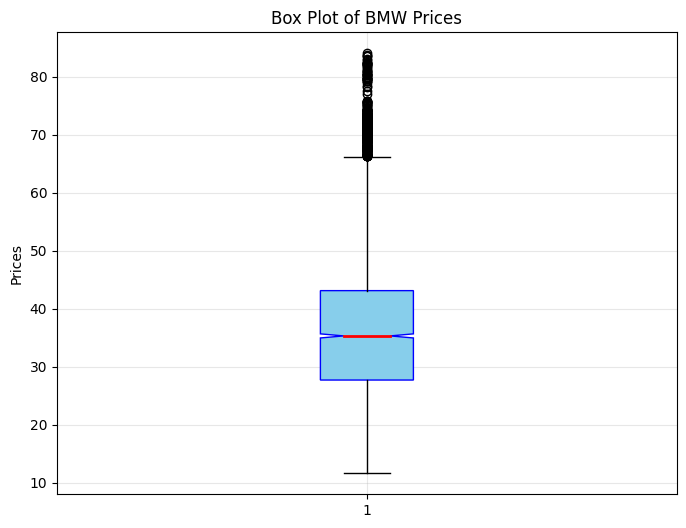

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Box plot of BMW Prices
plt.boxplot(df['Prices'], patch_artist=True, notch=True, 
            boxprops=dict(facecolor='skyblue', color='blue'),
            medianprops=dict(color='red', linewidth=2))

plt.title('Box Plot of BMW Prices')
plt.ylabel('Prices')
plt.grid(True, alpha=0.3)

plt.show()


##  Multiple Data Sets

# Generate Random Numbers

In [11]:
# Generate two datasets
y2 = np.random.standard_normal((250, 2)).cumsum(axis=0)

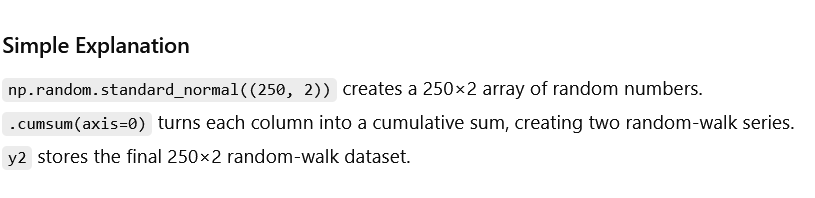

# Plot both series on the same graph.

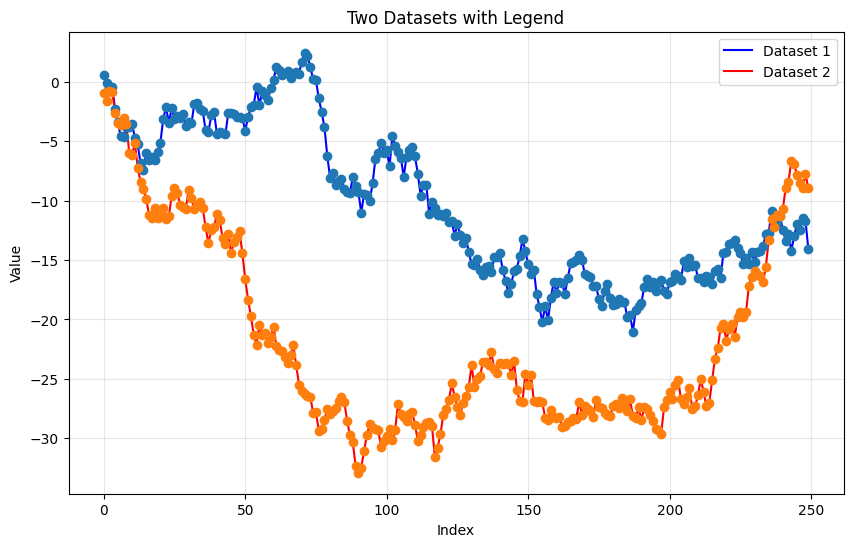

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(y2[:, 0], 'b-', lw=1.5, label='Dataset 1')
plt.plot(y2[:, 1], 'r-', lw=1.5, label='Dataset 2')
plt.plot(y2, 'o')  # Add markers
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Two Datasets with Legend')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.show()

# Now also generate a date column along with data for two random stocks

In [14]:
# Generate random walk data
y2 = np.random.standard_normal((250, 2)).cumsum(axis=0)

# Create a date range of 250 days
dates = pd.date_range(start='2025-01-01', periods=250, freq='D')

# Combine into a DataFrame
df = pd.DataFrame(y2, columns=['Stock 1', 'Stock 2'])
df['Date'] = dates

# Optional: set Date as index
df.set_index('Date', inplace=True)

print(df.head())

             Stock 1   Stock 2
Date                          
2025-01-01 -0.416586  1.679348
2025-01-02 -0.704299  1.058545
2025-01-03 -0.445481  2.722983
2025-01-04 -0.264170  2.322794
2025-01-05  1.045216  2.301897


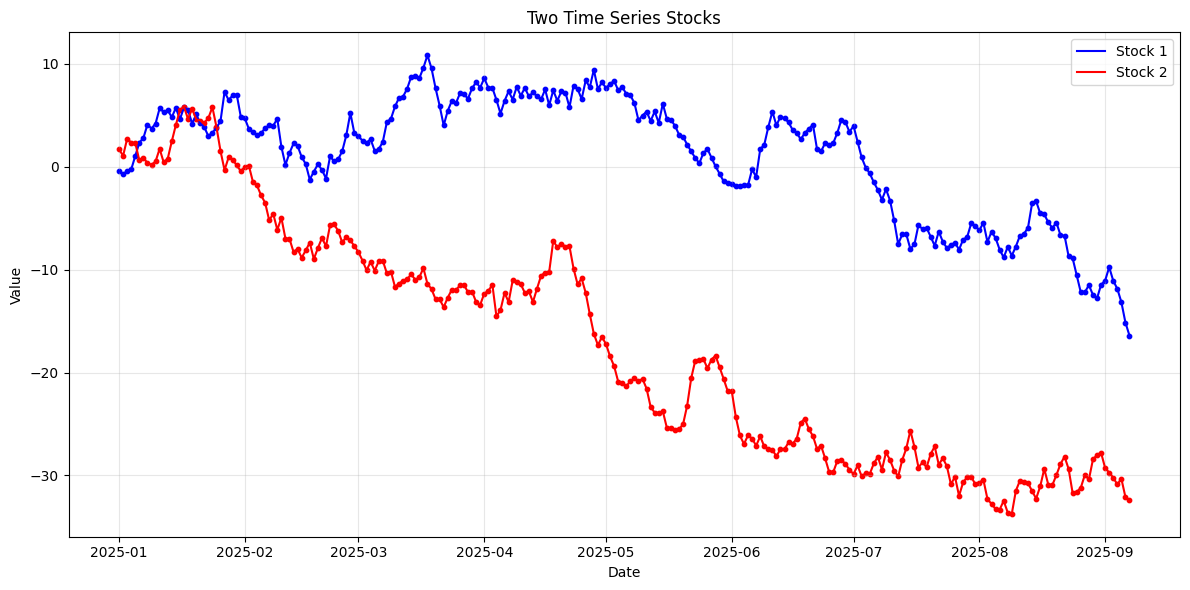

In [16]:
# Plot both series as time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Stock 1'], 'b-', lw=1.5, label='Stock 1')
plt.plot(df.index, df['Stock 2'], 'r-', lw=1.5, label='Stock 2')
plt.scatter(df.index, df['Stock 1'], color='blue', s=10)  # Add markers for Stock 1
plt.scatter(df.index, df['Stock 2'], color='red', s=10)   # Add markers for Stock 2
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Two Time Series Stocks')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()